In [6]:
criterion = torch.nn.BCELoss().to(device) # loss function 생성
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # 앞서 생성한 model의 parameter를 update 해주는 optimizer (다음 시간에 자세히)

In [49]:
import torch
from torch import nn, optim
from sklearn.datasets import load_wine

In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [51]:
import torch
from torch import nn, optim
from sklearn.datasets import load_wine
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

wine = load_wine()

input = wine.data
output = wine.target
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.33, random_state=42,stratify=output,shuffle = True)

X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

In [52]:
print(X_train[0])
print(y_train[0])

tensor([1.3750e+01, 1.7300e+00, 2.4100e+00, 1.6000e+01, 8.9000e+01, 2.6000e+00,
        2.7600e+00, 2.9000e-01, 1.8100e+00, 5.6000e+00, 1.1500e+00, 2.9000e+00,
        1.3200e+03], device='cuda:0')
tensor(0, device='cuda:0')


In [58]:
 model = nn.Sequential(
          nn.Linear(13, 100, bias=True),  
          nn.Sigmoid(),
          nn.Linear(100, 100, bias=True), 
          nn.Sigmoid(),
          nn.Linear(100, 3, bias=True), 
          nn.Softmax()
          ).to(device)

In [59]:
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=1)

In [60]:
losses = []
for epoch in range(100):

    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X_train)

    # 비용 함수
    cost = loss_fn(hypothesis, y_train)
    cost.backward()
    optimizer.step()
    losses.append(cost.item()) # 값만 가져오기 위해서 .item()

    # 10의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 10 == 0:
        print(epoch, cost.item())

0 1.093906044960022
10 1.084957242012024
20 1.0837172269821167
30 1.085005521774292
40 1.0850086212158203
50 1.085005760192871
60 1.085005521774292
70 1.085005521774292
80 1.085005283355713
90 1.0850051641464233


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


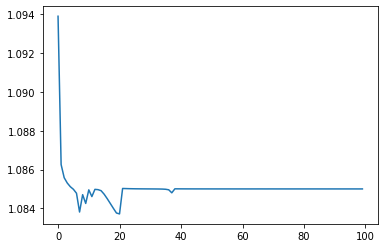

In [61]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [62]:
import numpy as np
with torch.no_grad():

    model = model.to('cpu')
    y_pred = model(X_test)

    y_pred = y_pred.detach().numpy() # tensor를 numpy로 바꿈
    predicted = np.argmax(y_pred,axis=1)
    print(f'model의 output은 :  {y_pred[0]}' )
    print(f'argmax를 한 후의 output은 {predicted[0]}')
    accuracy = (accuracy_score(predicted,y_test))
    print(f'accuracy는 {accuracy}')

model의 output은 :  [0.3300596  0.53770393 0.13223639]
argmax를 한 후의 output은 1
accuracy는 0.3898305084745763


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
